In [11]:
import numpy as np
import os
import matplotlib.pyplot as plt
arrays = {}
datapoint = '_01590.npz'                #Enter datapoint here (anywhere between _00000 and _06728)
for filename in os.listdir('/home/jibran/dexnet2_ws/dexnet2/Datasets/Data'):
    if filename.endswith(datapoint):
        arrays[filename.replace(datapoint, '')] = np.load('/home/jibran/dexnet2_ws/dexnet2/Datasets/Data/'+filename)
      

Index =  0
hand_poses :  [18.         16.          0.68586975  1.23590444 48.         19.
 12.        ]


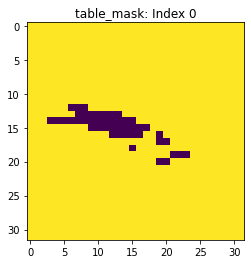

image_labels :  152887.0


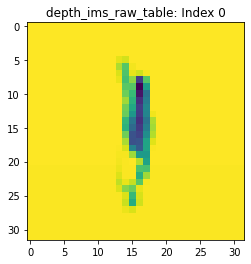

robust_ferrari_canny :  0.0
pose_labels :  3057.0


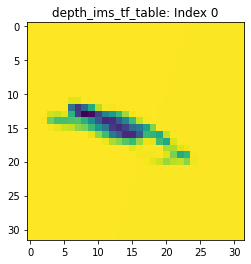

object_labels :  386.0


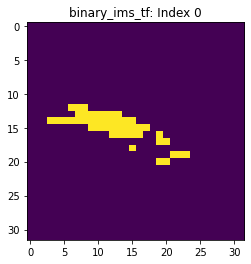

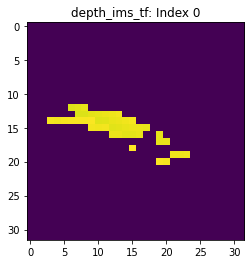

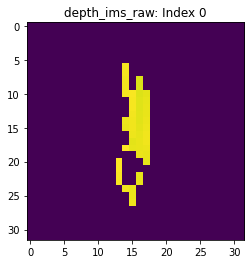

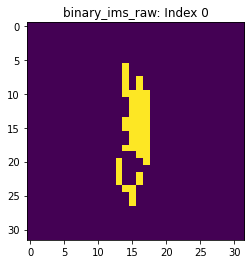

force_closure :  0.0
dict_keys(['hand_poses', 'table_mask', 'image_labels', 'depth_ims_raw_table', 'robust_ferrari_canny', 'pose_labels', 'depth_ims_tf_table', 'object_labels', 'binary_ims_tf', 'depth_ims_tf', 'depth_ims_raw', 'binary_ims_raw', 'force_closure'])
(1000,)
0.007480370026546982


In [12]:
#Visualization
index = np.random.randint(0, 1000)
features = {}
print('Index = ', index)
for array in arrays:
    f = arrays[array]
    feature = f['arr_0.npy']
    features[array] = feature
    if(len(feature.shape) > 2):
        plt.imshow(feature[index, :, :, :])
        plt.title(array+ ": "+ "Index "+str(index))
        plt.show()
    else:
        print(array, ": ", feature[index])
#Inputs to feed into CNN
print(features.keys())
aligned_imgs = features['depth_ims_tf_table']
# print(aligned_imgs.shape)
gripper_depths = features['hand_poses'][:, 2]          #aligned_imgs and gripper_depths are the X of our model.
# print(gripper_depths.shape)
grasp_metrics = features['robust_ferrari_canny']       #Y of our model
print(grasp_metrics.shape)
print(np.max(grasp_metrics))